In [43]:
import matplotlib.pyplot as plt
import pandas as pd

In [44]:
dataset = pd.read_csv("C:\\AI(ml&dl)\\jupiter(machine learning)\\Projetcs(ML)\\19_ClusterringUsingIncomeSpent_KMeans\\Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
dataset.shape

(200, 5)

In [46]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [48]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [50]:
dataset['Genre'] = dataset['Genre'].map({'Male':1,'Female':0}).astype(int)

In [59]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


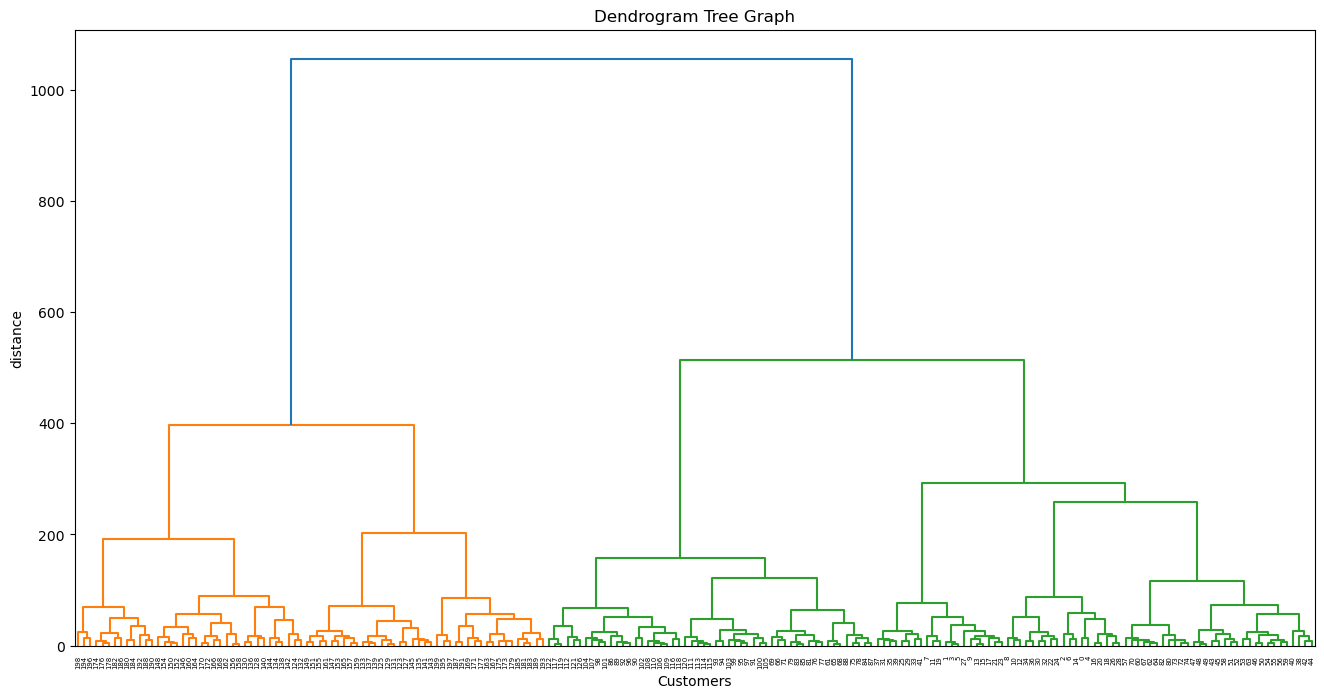

In [60]:
import scipy.cluster.hierarchy as clus
plt.figure(figsize = (16,8))
dendrogram = clus.dendrogram(clus.linkage(dataset,method = 'ward'))

plt.title('Dendrogram Tree Graph')
plt.xlabel('Customers')
plt.ylabel('distance')
plt.show()

In [62]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters = 5,affinity = 'euclidean' , linkage = 'average')
y_mean = model.fit_predict(dataset)
y_mean

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

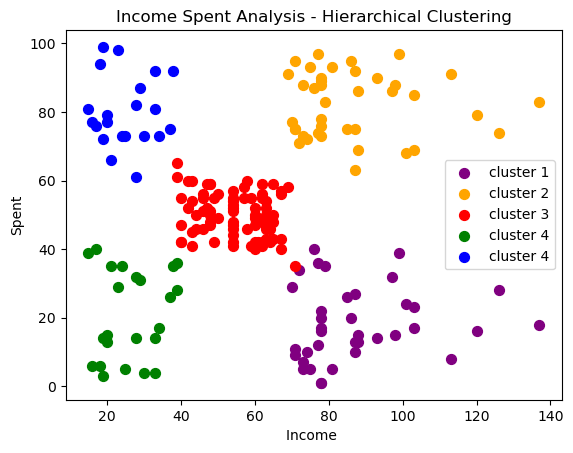

In [68]:
x = dataset.iloc[:,[3,4]].values
plt.scatter(x[y_mean==0,0],x[y_mean==0,1],s = 50, c = 'purple', label = 'cluster 1')
plt.scatter(x[y_mean==1,0],x[y_mean==1,1],s = 50, c = 'orange', label = 'cluster 2')
plt.scatter(x[y_mean==2,0],x[y_mean==2,1],s = 50, c = 'red', label = 'cluster 3')
plt.scatter(x[y_mean==3,0],x[y_mean==3,1],s = 50, c = 'green', label = 'cluster 4')
plt.scatter(x[y_mean==4,0],x[y_mean==4,1],s = 50, c = 'blue', label = 'cluster 4')

plt.title('Income Spent Analysis - Hierarchical Clustering')
plt.xlabel('Income ')
plt.ylabel('Spent')
plt.legend()
plt.show()
